In [4]:
"""
    CS5800 - Algorithm - Lindsay Jamieson
    Topic: 3D maze - A* Path Finding Algorithm
    Group: Sida Zhang, Qiwei Hu, Hongyu Wan, Zheng Yin

    Generate the 3-D Maze
"""
%matplotlib widget
import sys
import numpy as np


class Position:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.dist = sys.maxsize

    def get_position(self):
        position = [self.x, self.y, self.z]
        return position


class TheMaze:
    def __init__(self, size):
        self.size = size
        self.obstacles_size = size // 2
        self.obstacles = []

        self.generate_obstacle()

    # check if a point is in obstacle
    def obstacle_check(self, x, y, z):
        for obs in self.obstacles:
            for i in obs:
                if x == i.x and y == i.y and z == i.z:
                    return True
        return False

    # generate obstacle randomly
    def obstacle(self, x_obstacle, y_obstacle, z_obstacle):
        block = []
        x = np.random.randint(0, self.size - x_obstacle)
        y = np.random.randint(0, self.size - y_obstacle)
        z = np.random.randint(0, self.size - z_obstacle)
        for i in range(x_obstacle):
            for j in range(y_obstacle):
                for k in range(z_obstacle):
                    block.append(Position(x + i, y + j, z + k))
        return block

    # append all the obstacles to the maze
    def generate_obstacle(self):
        for i in range(self.obstacles_size - 1):
            direction = np.random.randint(0, 2)

            if direction == 0:
                obstacle_size = np.random.randint(1, self.size)
                self.obstacles.append(self.obstacle(obstacle_size, obstacle_size, 1))
            elif direction == 1:
                obstacle_size = np.random.randint(1, self.size)
                self.obstacles.append(self.obstacle(obstacle_size, 1, obstacle_size))
            elif direction == 2:
                obstacle_size = np.random.randint(1, self.size)
                self.obstacles.append(self.obstacle(1, obstacle_size, obstacle_size))

In [5]:
"""
    CS5800 - Algorithm - Lindsay Jamieson
    Topic: 3D maze - A* Path Finding Algorithm
    Group: Sida Zhang, Qiwei Hu, Hongyu Wan, Zheng Yin

    Executing A * Algorithm
"""
import sys
import numpy as np

class AStarAlgo:
    def __init__(self, maze):
        self.maze = maze
        self.open_array = []
        self.close_array = []

    # returns the distance in one of the following distance calculation methods
    @staticmethod
    def dist(method, dx, dy, dz, dist):
        # method 0 returns the distance of Diagonal
        # method 1 returns the distance of Euclidean
        # method 2 returns the distance from Manhattan
        if method == "0":        # Diagonal
            return dx + dy + dz + (dist - 2) * min(dx, dy, dz)
        elif method == "1":     # Euclidean
            return np.sqrt(dx * dx + dy * dy + dz * dz)
        elif method == "2":     # Manhattan
            return dx + dy + dz
        return 0

    # returns the total distance from starting point to the ending point by averaging the three methods.
    def total_dist(self, position):
        distance = np.sqrt(3)
        sx = position.x
        sy = position.y
        sz = position.z

        ex = self.maze.size - 1 - position.x
        ey = self.maze.size - 1 - position.y
        ez = self.maze.size - 1 - position.z

        start_dist = (self.dist("0", sx, sy, sz, distance) + self.dist("1", sx, sy, sz, distance) +
                      self.dist("2", sx, sy, sz, distance)) / 3
        end_dist = (self.dist("0", ex, ey, ez, distance) + self.dist("1", ex, ey, ez, distance) +
                    self.dist("2", ex, ey, ez, distance)) / 3

        return start_dist + end_dist

    # validation check 1； check if the position is in the maze, and it is not an obstacle
    def validation(self, x, y, z):
        if x < 0 or y < 0 or z < 0:
            return False
        elif x >= self.maze.size or y >= self.maze.size or z >= self.maze.size:
            return False
        # check if the position is in obstacle
        return not self.maze.obstacle_check(x, y, z)

    # validation check 2: check if the coordinate is in the set
    @staticmethod
    def array_check(position, array):
        for pos in array:
            if position.x == pos.x and position.y == pos.y and position.z == pos.z:
                return True
        return False

    # validation check 3: check if the coordinate is in the open array
    def in_open_array(self, position):
        return self.array_check(position, self.open_array)

    # validation check 4: check if the coordinate is in the closed array
    def in_close_array(self, position):
        return self.array_check(position, self.close_array)

    # validation check 5: check if the coordinate is at the starting point
    @staticmethod
    def validation_start(position):
        if position.x == 0 and position.y == 0 and position.z == 0:
            return True
        return False

    # validation check 5: check if the coordinate is at the ending point
    def validation_end(self, position):
        if position.x == self.maze.size - 1 and position.y == self.maze.size - 1 and position.z == self.maze.size - 1:
            return True
        return False

    # return the shortest distance from the open array
    def select_from_open_set(self):
        idx = 0
        current = -1
        min_dist = sys.maxsize
        for pos in self.open_array:
            dist = self.total_dist(pos)
            if dist < min_dist:
                min_dist = dist
                current = idx
            idx += 1
        return current

    # append neighbors to the open array
    def append_neighbor(self, x, y, z, parent):
        pos = Position(x, y, z)
        if not self.validation(x, y, z):
            return
        if self.in_close_array(pos):
            return
        if not self.in_open_array(pos):
            pos.parent = parent
            pos.dist = self.total_dist(pos)
            self.open_array.append(pos)

    # building the path
    def build_path(self, pos):
        path = []
        while True:
            path.insert(0, pos)
            if self.validation_start(pos):
                break
            else:
                pos = pos.parent
        return path

    # main function to run the A star algorithm.
    def execute(self):
        # initialize the starting point and distance
        start_point = Position(0, 0, 0)
        start_point.dist = 0
        self.open_array.append(start_point)

        while True:
            idx = self.select_from_open_set()
            if idx < 0:
                print('No path found.')
                return []
            pos = self.open_array[idx]

            if self.validation_end(pos):
                return self.build_path(pos)

            del self.open_array[idx]
            self.close_array.append(pos)

            # Coordinates
            x = pos.x
            y = pos.y
            z = pos.z
            # Neighbors:
            value=[-1,0,1]
            for i in value:
                for j in value:
                    for k in value:
                        self.append_neighbor(x + i, y + j, z + k, pos)

A* Maze Generator has started
Please enter the size of maze you want to make (> 5): 7
A path has found!
[0, 0, 0] - [1, 0, 1] - [1, 0, 2] - [1, 0, 3] - [2, 0, 4] - [3, 1, 5] - [3, 2, 4] - [3, 3, 3] - [4, 4, 4] - [5, 5, 5] - [6, 6, 6] - 



C:\Users\hongy\AppData\Local\Temp/ipykernel_6512/3483993497.py:64: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


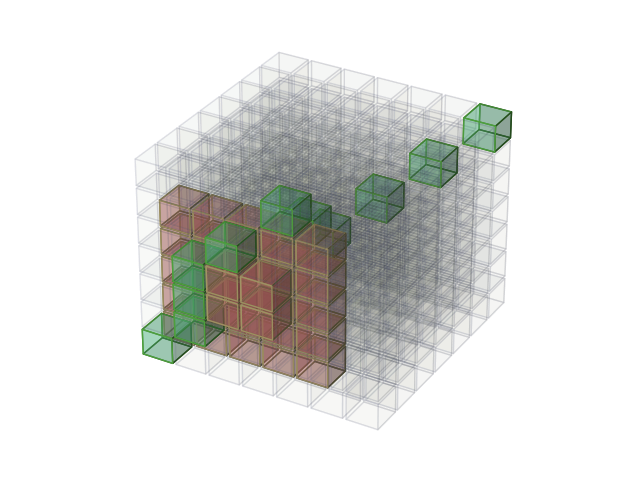

A* Maze Generator is now completed, the path is now shown in MatPlot


In [7]:
"""
    CS5800 - Algorithm - Lindsay Jamieson
    Topic: 3D maze - A* Path Finding Algorithm
    Group: Sida Zhang, Qiwei Hu, Hongyu Wan, Zheng Yin

    execute the program and draw the 3-D maze with MatPlot
    3D projection:
"""
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection on Jupyter, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D


# draw obstacle in red cubes
def obstacle_cube(position):
    n_cubes[position[0]][position[1]][position[2]] = True


# draw path in green cubes
def find_path_3d(position):
    path_cubes[position[0]][position[1]][position[2]] = True


# build up the numpy logo
def explode(data):
    # https://matplotlib.org/3.5.0/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e


def plot_now(n_cubes, path_cubes):
    # red
    # 26 15%
    # 4D 30%
    # for transparency: https://css-tricks.com/8-digit-hex-codes/
    facecolors = np.where(n_cubes, '#d370704D', '#d3707003')
    edgecolors = np.where(n_cubes, '#BFAB6E', '#7D84A60D')
    facecolors_3 = np.where(path_cubes, '#5ccd954D', '#5ccd9503')
    edgecolors_3 = np.where(path_cubes, '#58b445', '#7D84A60D')
    filled = np.ones(n_cubes.shape)

    # upscale the above voxel image, leaving gaps
    filled_2 = explode(filled)
    fcolors_2 = explode(facecolors)
    ecolors_2 = explode(edgecolors)

    fcolors_3 = explode(facecolors_3)
    ecolors_3 = explode(edgecolors_3)

    # Shrink the gaps
    x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
    x[0::2, :, :] += 0.05
    y[:, 0::2, :] += 0.05
    z[:, :, 0::2] += 0.05
    x[1::2, :, :] += 0.95
    y[:, 1::2, :] += 0.95
    z[:, :, 1::2] += 0.95

    fig = plt.figure()
#     ax = fig.gca(projection='3d')
    ax = Axes3D(fig)
    ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
    ax.voxels(x, y, z, filled_2, facecolors=fcolors_3, edgecolors=ecolors_3)
    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    print("A* Maze Generator has started")
    val = input("Please enter the size of maze you want to make (> 5): ")
    if int(val) <= 5:
        print("Please enter size larger than 5x5x5 for the 3D maze.")
        exit()
    maze = TheMaze(int(val))
    n_cubes = np.zeros((int(val), int(val), int(val)), dtype=bool)
    path_cubes = np.zeros((int(val), int(val), int(val)), dtype=bool)
    for a in maze.obstacles:
        for b in a:
            obstacle_cube(b.get_position())

    a_star = AStarAlgo(maze)
    path = a_star.execute()

    print("A path has found!")
    for i in path:
        print("[" + str(i.x) + ", " + str(i.y) + ", " + str(i.z) + "]", end=' - ')
        find_path_3d(i.get_position())
    print("\n")
    plot_now(n_cubes, path_cubes)
    print("A* Maze Generator is now completed, the path is now shown in MatPlot")